# Skewness Colors

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


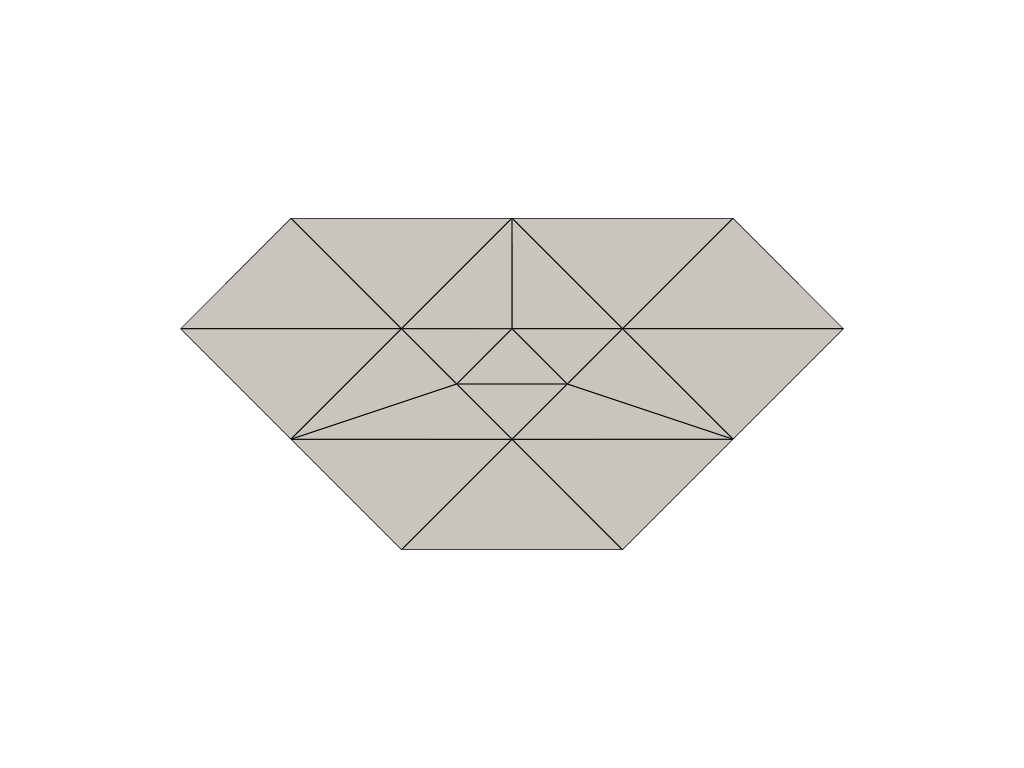

In [1]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 5 #number of the cell you wish to refine
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
cy=[d,e,f] #the numbers of the points creating the cell
g = len(points) #the total number of points in the mesh
i = len(cells) #the total number of cells in the mesh


#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side
points = np.vstack([points,point1,point2,point3]) #adding the points to the points array

g = len(points) #the new total number of points

#changing the original cell to to the refined cell
cells[c]= [3, (g-1),(g-2),f] 
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#--------Finding the neighbouring cells-------------------------------------------------------------------------------#
y = [] #numbers of the neighbouring cells
v = 0

for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and e in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    y.append(i+1) 

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if e in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    v=0 
    y.append(i+1)     

v=0
for x in range(0,i): #looks for a match in points in the neigbouring cells and the original cell
    if d in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1     
if v!= 1:
    v=0
    y.append(i+1)

#--------Determining which point the cells do not share---------------------------------------------------------------#
r =[]

for x in range (0,3):
    q = cells[y[x]][1:] #points in the neighbouring cell
    for x in range (0,3):
        q1 = q[x]
        if q1 in cy: #if two cells share a point
            t = 1
            r.append(t)
        else: # if two cells do not share a point
            t = 0
            r.append(t)

#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
j = 0
h = 0
p = [] #a storange array for the following for loop
n = []
m = [] #an array containing the index numbers of the overlapping points

for x in range(0,len(r)+1):
    if j < 3: 
        a = r[x]
        p.append(a)
        j = j+1
    elif j == 3:  
        for z in range(0,3):
            z1=p[z]
            if z1==1:
                n.append(z)
                h=h+1
                if h == 2:
                    m.append(n[0])
                    m.append(n[1])
                    n = []
        h = 0 
        p = [] 
        n = []
        
        if x < 9:
            a = r[x]
            p.append(a)
        j=1
        h=0

n=3
j=0 

#Splitting the neigbouring cells in two
for z in range(0,3):
    u = y[z]
    if u <= i:
        d1 = cells[y[z]][1]
        e1 = cells[y[z]][2]
        f1 = cells[y[z]][3]
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n   
        cells[y[z]]= cell
        j=j+1
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n
        cells = np.vstack([cells, cell])  
        j=j+1
    n=n-1
    
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
pl.set_background('white')
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

In [2]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = float(max((qmax-qe)/(180-qe), (qe-qmin)/qe))
            Skewness.append(skewness)    
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.329
The minimum Skewness of the mesh is 0.25
the maximum Skewness of the mesh is 0.693


In [3]:
mesh.cell_data['Skewness']= Skewness
mesh.cell_data['Skewness']

pyvista_ndarray([0.25      , 0.25      , 0.25      , 0.25      ,
                 0.55724915, 0.25      , 0.25      , 0.25      ,
                 0.55724915, 0.25      , 0.25      , 0.25      ,
                 0.25      , 0.25      , 0.25      , 0.25      ,
                 0.69275085, 0.25      , 0.69275085])

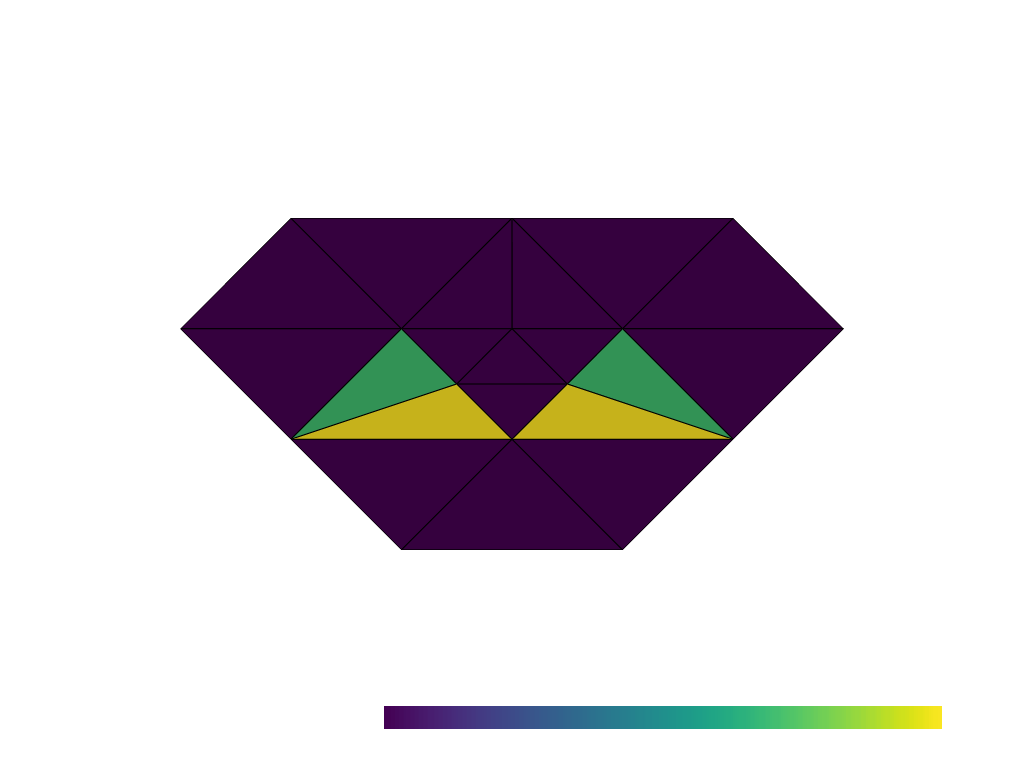

In [4]:
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
pl.set_background('white')
_ = pl.add_scalar_bar('Skewness', interactive=True, vertical=False,
                           title_font_size=35,
                           label_font_size=30,
                           outline=True, fmt='%10.5f')
pl.camera_position = 'xy'
pl.show()

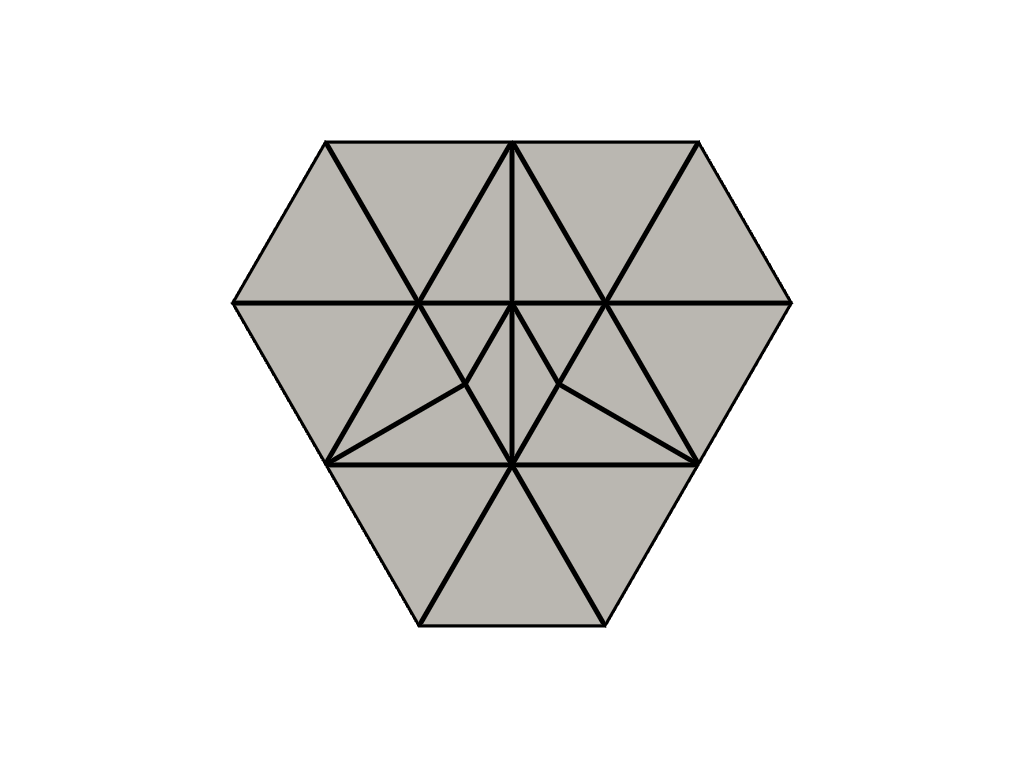

In [5]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,math.sqrt(3),0],
                  [4,0,0],
                  [3,math.sqrt(3),0],
                  [1,-math.sqrt(3),0],
                  [3,-math.sqrt(3),0],
                  [6,0,0],
                  [5,math.sqrt(3),0],
                  [5,-math.sqrt(3),0],
                  [2,-2*math.sqrt(3),0],
                  [4,-2*math.sqrt(3),0],
                  [3,0,0],
                  [2.5, -0.5*math.sqrt(3),0],
                  [3.5, -0.5*math.sqrt(3),0]])
cells = [[3, 0,1,2], 
         [3, 1,12,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,13],
         [3, 6,14,12],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 14,9,3],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6],
         [3, 13,6,12],
         [3, 4,12,3],
         [3, 1,13,12],
         [3, 1,5,13],
         [3, 12,14,3],
         [3, 6,9,14]]

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

The average Skewness of the mesh is 0.211
The minimum Skewness of the mesh is 0.0
the maximum Skewness of the mesh is 0.5


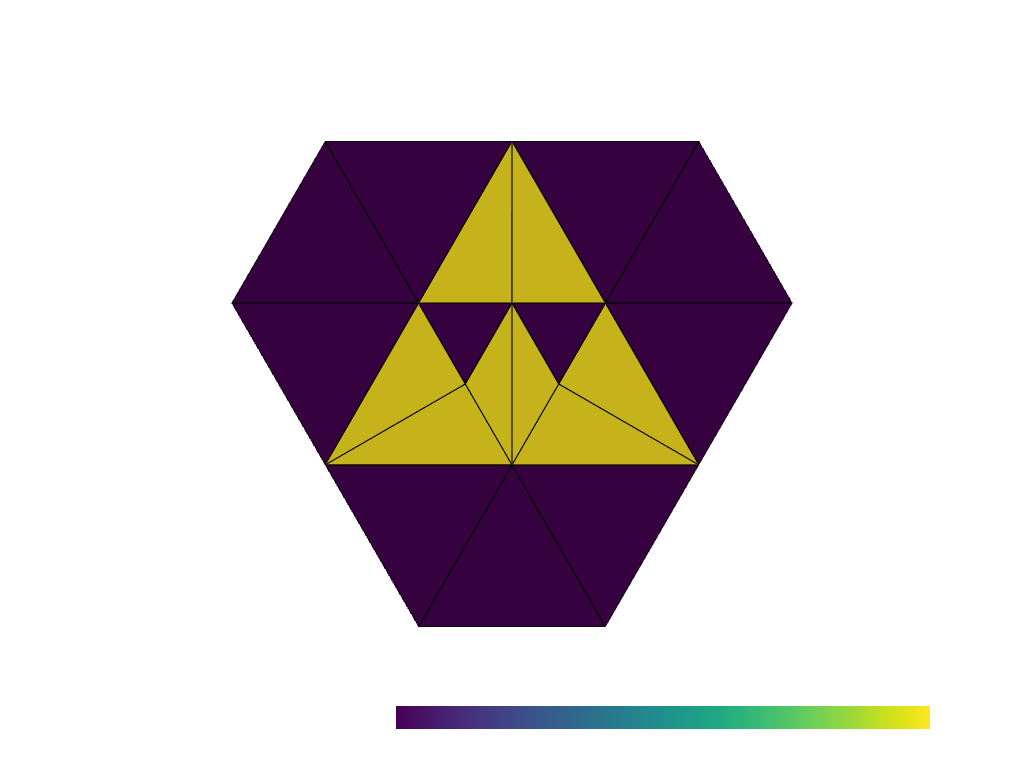

In [6]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = float(max((qmax-qe)/(180-qe), (qe-qmin)/qe))
            Skewness.append(skewness)    
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

mesh.cell_data['Skewness']= Skewness
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
pl.set_background('white')
pl.add_scalar_bar('Skewness', interactive=True, vertical=False,
                           title_font_size=35,
                           label_font_size=30,
                           outline=True, fmt='%10.5f')
pl.camera_position = 'xy'
pl.show()

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


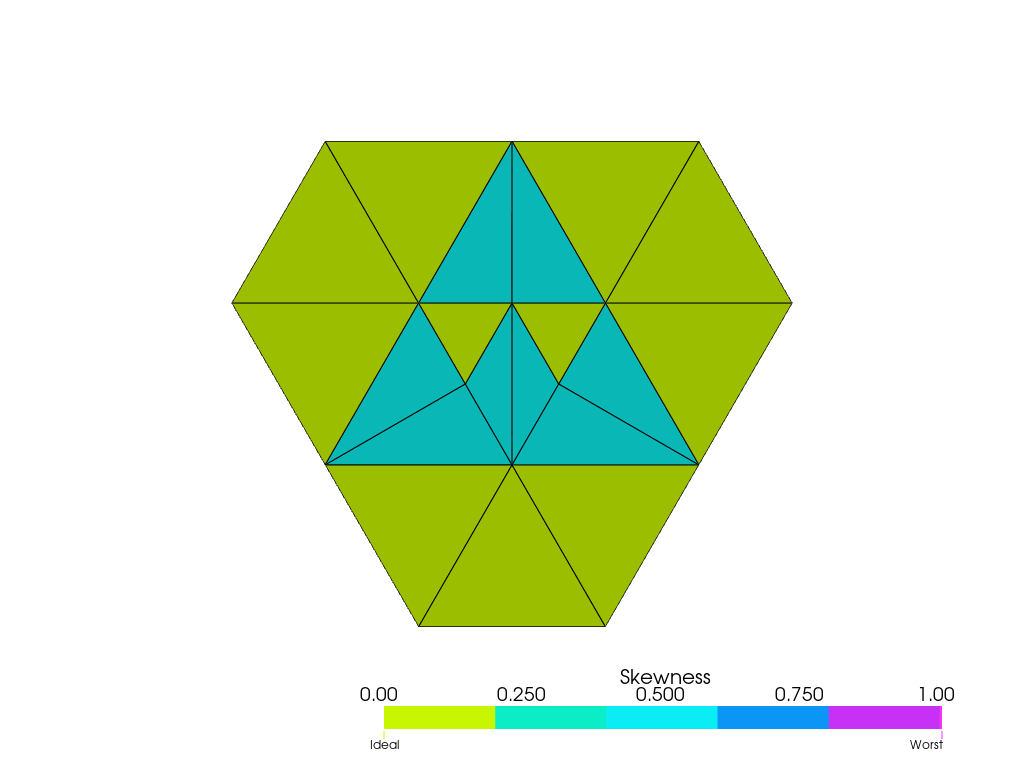

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

import pyvista as pv
from pyvista import examples

# Define the colors we want to use
blue = np.array([12/256, 238/256, 246/256, 1])
black = np.array([11/256, 11/256, 11/256, 1])
grey = np.array([189/256, 189/256, 189/256, 1])
yellow = np.array([255/256, 247/256, 0/256, 1])
green = np.array([200/256, 247/256, 0/256, 1])
lightgreen = np.array([200/256, 247/256, 200/256, 1])
greenblue = np.array([12/256, 238/256, 200/256, 1])
darkblue = np.array([12/256, 150/256, 246/256, 1])
purple= np.array([200/256, 50/256, 246/256, 1])
pink= np.array([250/256, 50/256, 246/256, 1])
lightpink = np.array([250/256, 50/256, 246/256, 0.7])
orange = np.array([250/256, 150/256, 0/256, 0.7])
yelloworange = np.array([250/256, 200/256, 0/256, 0.7])

skewness = np.linspace(mesh['Skewness'].min(), mesh['Skewness'].max(), 256)
newcolors = np.empty((256, 4))
newcolors[skewness >= 0] = green
#newcolors[skewness > 0.1] = lightgreen
newcolors[skewness > 0.1] = greenblue
newcolors[skewness > 0.2] = blue
newcolors[skewness > 0.3] = darkblue
newcolors[skewness > 0.4] = purple
newcolors[skewness > 0.5] = pink
newcolors[skewness > 0.6] = lightpink
newcolors[skewness > 0.7] = orange
newcolors[skewness > 0.8] = yelloworange
newcolors[skewness > 0.9] = yellow
newcolors[skewness >= 1] = orange

my_colormap = ListedColormap(newcolors)
annotations = {
    1: "Worst",
    0: "Ideal",
}

pl = pyvista.Plotter()
pl.set_background('white')
pv.global_theme.font.color = 'black'
pl.add_mesh(mesh, show_edges=True, line_width=0.5,scalars='Skewness',
            cmap=my_colormap, annotations=annotations,clim=[0, 1])
pl.camera_position = 'xy'
pl.show()

The average Skewness of the mesh is 0.246
The minimum Skewness of the mesh is 0.0
the maximum Skewness of the mesh is 0.557


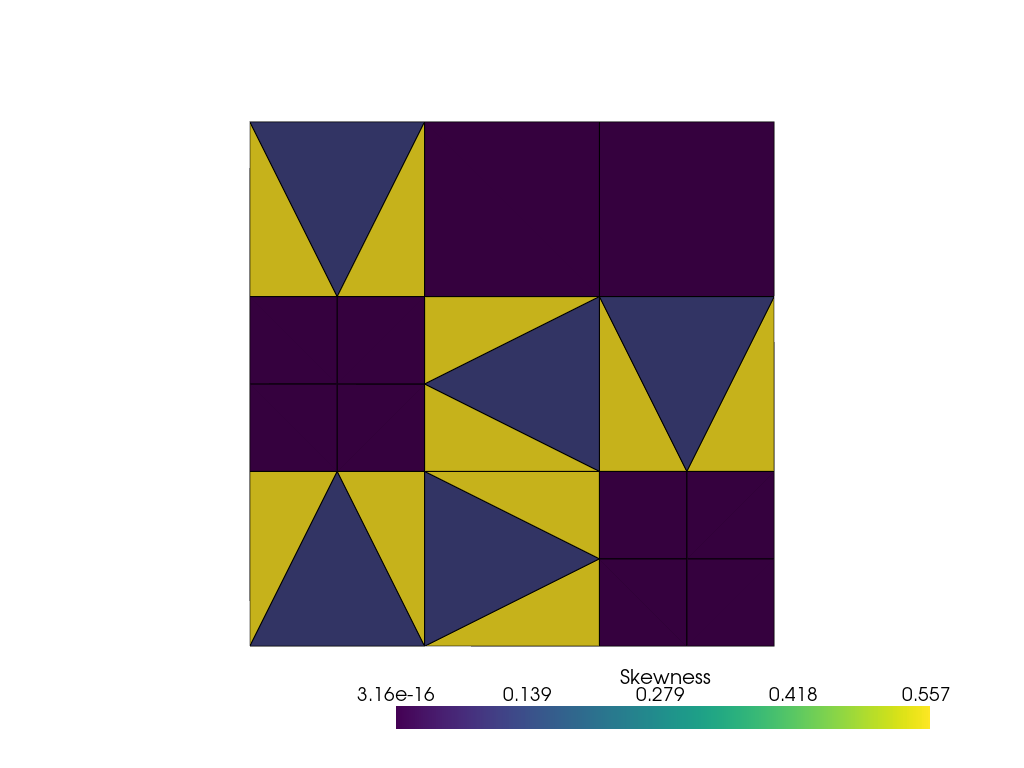

In [8]:
# mesh points
points = np.array([[0,0,0],
                     [1,0,0],
                     [1,1,0],
                     [0,1,0],
                     [2,1,0],
                     [2,0,0],
                     [0,2,0],
                     [1,2,0],
                     [2,2,0],
                     [0,3,0],
                     [1,3,0],
                     [2,3,0],
                     [3,0,0],
                     [3,1,0],
                     [3,2,0],
                     [3,3,0],
                   [0.01,0.01,0]])

# mesh faces
cells = np.array([[4, 0,1,2,3],
                  [4, 4,2,1,5],
                  [4, 6,3,2,7],
                  [4, 7,2,4,8],
                  [4, 9,6,7,10],
                  [4, 10,7,8,11],
                  [4, 15,11,8,14],
                  [4, 14,8,4,13],
                  [4, 4,5,12,13]])  

c = [2,8] #index numbers of the cell you wish to refine
      
#-------------------------------------------------------------------------------#    
#--------Finding the neighbouring cells of the cells you wish to refine---------#
#-------------------------------------------------------------------------------#

len_points = len(points) #the total number of points in the mesh
len_cells = len(cells) #the total number of cells in the mesh

clen = len(c) #the total number of cells you wish to refine
ytotal = []  #numbers of the neigbouring cells of all cells you wish to refine in array per cell
ytotaly = [] #numbers of the neigbouring cells of all cells you wish to refine
cells1 = [[0,0,0,0]]

for cx in range(0,clen): #for every cell listed in array {c}

    d1 = cells[c[cx]][1] 
    d2 = cells[c[cx]][2]
    d3 = cells[c[cx]][3]
    d4 = cells[c[cx]][4]
    cy=[d1,d2,d3,d4] #the numbers of the points creating the cell

    y = [] #numbers of the neighbouring cells of cell cx
    v = 0 #temporary variable

    for x in range(0,len_cells): #for all cells in the mesh
        if d1 in cells[x][1:] and d2 in cells[x][1:]: #looks for the side DE in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d2 in cells[x][1:] and d3 in cells[x][1:]: #looks for the side EF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d3 in cells[x][1:] and d4 in cells[x][1:]: #looks for the side DF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1   
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d4 in cells[x][1:] and d1 in cells[x][1:]: #looks for the side DF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1   
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    ytotal.append(y)
    
#-------------------------------------------------------------------------#
#---------Finding neighbouring cells that are called for twice------------#
#-------------------------------------------------------------------------#
i=0
clen= len(c)
for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
    for z in range(0,4):
        if ytotal[x][z] in ytotaly[4+i:]: #if the cell is listed again in {ytotal}
            if ytotal[x][z] != len_cells+1+3*clen: #if it is not the additional cell added for no connection
                if ytotal[x][z] not in c: #if the cell is not listed in {c}
                    c.append(ytotal[x][z]) #add the cell to {c}
                    v =1
            else:
                v=0
        else:
            v=0

    i = i+4
    
if len(c)==clen: #if at least two cells share the same neighbouring cell. The code will be ran again.
    a=1
    
else:
    while True:
        clen=len(c) #the new total number of cells you wish to refine
        ytotal = [] #numbers of the neigbouring cells of all cells you wish to refine
        ytotaly= []
        #-------------------------------------------------------------------------------#    
        #--------Finding the neighbouring cells of the cells you wish to refine---------#
        #-------------------------------------------------------------------------------#

        for cx in range(0,clen): #for every cell listed in array {c}
            d1 = cells[c[cx]][1] 
            d2 = cells[c[cx]][2]
            d3 = cells[c[cx]][3]
            d4 = cells[c[cx]][4]
            cy=[d1,d2,d3,d4] #the numbers of the points creating the cell

            y = [] #numbers of the neighbouring cells of cell cx
            v = 0 #temporary variable

            for x in range(0,len_cells): #for all cells in the mesh
                if d1 in cells[x][1:] and d2 in cells[x][1:]: #looks for the side DE in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)
                    
            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d2 in cells[x][1:] and d3 in cells[x][1:]: #looks for the side EF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)

            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d3 in cells[x][1:] and d4 in cells[x][1:]: #looks for the side DF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1   
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)

            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d4 in cells[x][1:] and d1 in cells[x][1:]: #looks for the side DF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1   
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)
                    
            ytotal.append(y)

        #-------------------------------------------------------------------------#
        #---------Finding neighbouring cells that are called for twice------------#
        #-------------------------------------------------------------------------#

        i=0
        for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
            for z in range(0,4): 
    
                if ytotal[x][z] in ytotaly[4+i:]: #if the cell is listed again in {ytotal}
                    if ytotal[x][z] != len_cells+1+3*clen: #if it is not the additional cell added for no connection
                        if ytotal[x][z] not in c: #if the cell is not listed in {c}
                            c.append(ytotal[x][z]) #add the cell to {c}
                            v =1
                    else:
                        v=0
                else:
                    v =0

            i = i+4

        if len(c)==clen: #if at least two cells share the same neighbouring cell. The code will be ran again.
            break

#------------------------------------------------------------------#
#--------Taking out the cells that are already to be refined-------#
#------------------------------------------------------------------#

yleft = ytotal #the numbers of the cells that need to be split in two

for x in range (0,len(ytotal)): #for all neigbouring cells
    for z in range(0,4): 
        if ytotal[x][z] in c: #if a cell listed in {ytotal} is already in {c}
            yleft[x][z] = len_cells+1+3*len(c) #all cells that are already being refined are replaced by the number len_cells+1
        elif ytotal:
            v=0
        
#---------------------------------------------------------------#
#--------Determining which point the cells do not share---------#
#---------------------------------------------------------------#

r=[] #an array containing a 1 for sharing and a 0 for not sharing
for cx in range(0,clen):
    rx = [] #temporary storange array
    y = yleft[cx] #the numbers of the neigbouring cells  
    d1 = cells[c[cx]][1] 
    d2 = cells[c[cx]][2]
    d3 = cells[c[cx]][3]
    d4 = cells[c[cx]][4]
    cy=[d1,d2,d3,d4] #the numbers of the points creating the cell
    for x in range (0,4):
        if y[x] <= len_cells:
            q = cells[y[x]][1:] #points in the neighbouring cell
            for x in range (0,4):
                q1 = q[x]

                if q1 in cy: #if two cells share a point
                    t = 1
                    rx.append(t)
                else: # if two cells do not share a point
                    t = 0
                    rx.append(t)
        else:
            rx.append(0)
            rx.append(0)
            rx.append(0)
            rx.append(0)
    r.append(rx)
#---------------------------------------#
#-----Splitting the cell in four--------# 
#---------------------------------------#
for cx in range(0,clen):
    d1 = cells[c[cx]][1]
    d2 = cells[c[cx]][2]
    d3 = cells[c[cx]][3]
    d4 = cells[c[cx]][4]

    point1 = ((points[d2]+points[d1])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[d3]+points[d2])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d4]+points[d3])/2) #creating a additional point in the middle of the third edge of the side
    point4 = ((points[d1]+points[d4])/2) #creating a additional point in the middle of the fourth edge of the side
    point5 = ((points[d1]+points[d3])/2) #creating a additional point in the middle of the fourth edge of the side
    points = np.vstack([points,point1,point2,point3,point4,point5]) #adding the points to the points array
    
    g = len(points) #the new total number of points

    #changing the original cell to to the refined cell
    cells[c[cx]]= [4, d1,(g-5),(g-1),(g-2)] 
    cells = np.vstack([cells, [4, (g-5),d2,(g-4),(g-1)]])
    cells = np.vstack([cells, [4, (g-4),d3,(g-3),(g-1)]])
    cells = np.vstack([cells, [4, (g-1),(g-3),d4,(g-2)]])
    
#-------------------------------------------------#   
#---------Splitting the neighbouring cells--------#
#-------------------------------------------------#

for cx in range(0,len(c)):

    j = 0
    h = 0
    p = [] #a storange array for the following for loop
    n = []
    m = [] #an array containing the index numbers of the overlapping points
    rx = r[cx]  

    for x in range(0,len(rx)+1):
        if j < 4: 
            a = rx[x]
            p.append(a)
            j = j+1
        elif j == 4:  
            for z in range(0,4):
                z1=p[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        if n[0]==0 and n[1]==3:
                            m.append(n[1])
                            m.append(n[0])
                        else:
                            m.append(n[0])
                            m.append(n[1])
                        
            if n==[]:
                m.append(4)
                m.append(4)
                
            h = 0 
            p = [] 
            n = []

            if x < 13:
                a = rx[x]
                p.append(a)
            j=1
            h=0
    n=5
    g=len(points)-5*(len(c)-cx-1)
    j=0 
    y = yleft[cx]

    #Splitting the neigbouring cells in three
    for z in range(0,4):
        if m[0]==4:
            n=n-1
            m=m[2:]
            
        u = y[z]
        if u <= len_cells:
            d1 = cells[y[z]][1]
            d2 = cells[y[z]][2]
            d3 = cells[y[z]][3]
            d4 = cells[y[z]][4]
            cy=[d1,d2,d3,d4]

            #changing the original cell to to the refined cell
            if cells1[0][0] == 0:
                cells1 = [3, cy[m[0]], (g-n), cy[m[0]-1]]
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-2],cy[m[0]-1]]])
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-3],cy[m[0]-2]]])
            else:
                cells1 = np.vstack([cells1, [3, cy[m[0]], (g-n), cy[m[0]-1]]])
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-2],cy[m[0]-1]]])
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-3],cy[m[0]-2]]])
            n=n-1
            m=m[2:]

#----------------------------------------------#
#--------Merging the triangles and squares-----#
#----------------------------------------------#

cells2=[]
yfinal =[]
for x in range(0, len(c)):
    yfinal.append(yleft[x][0])
    yfinal.append(yleft[x][1])
    yfinal.append(yleft[x][2])
    yfinal.append(yleft[x][3])
    
v=0
for cx in range(0,(len(cells))):

    if cx in yfinal:
        for y in range(0, 3):
            for x in range(0,4):
                cells2.append(cells1[v][x])
            v=v+1
            
    else:            
        for x in range(0,5):
            cells2.append(cells[cx][x])

lencells=len(cells)
i=0
for x in range(0, lencells):
    if x in yfinal:    
        cellsx=cells[(i+1):]
        cells=cells[0:i]
        cells=np.vstack([cells,cellsx])
        i = i-1
    i=i+1
import math
cells0 = cells2

x=0
p = []
i = 0
Skewness = []
distance = []

while cells0 != []:
    if cells0[x] == 3: #If the mesh is triangular
        z1 = 3
        z2 = 5
        qe = 60
    elif cells0[x] == 4: #is the mesh is square
        z1 = 4
        z2 = 6
        qe = 90
        z3 = 2
    
    for y in range(1,z2):
        if i < z1:
            a = points[cells0[y]]
            p.append(a)
            i = i+1
        elif i == z1:
            if z1 ==3:
                for z in range(0,z1):
                    l = abs(p[z%z1]-p[(z+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle

            elif z1 == 4:
                for z in range(0,z1):
                    l = abs(p[z%z1]-p[(z+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]

                for z in range(0,z3):
                    l = abs(p[z%z1]-p[(z+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
    
    if cells0[x] == 3: #If the mesh is triangular
        cells0=cells0[4:]
    elif cells0[x] == 4: #is the mesh is square
        cells0=cells0[5:]    
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3)) 
#-------------------------------------------#
#---------Plotting the new mesh-------------#
#-------------------------------------------#
mesh = pyvista.PolyData(points, cells2)
mesh.cell_data['Skewness']= Skewness
mesh.cell_data['Skewness']
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.5)
pl.set_background('white')
_ = pl.add_scalar_bar('Skewness', interactive=True, vertical=False,
                           title_font_size=35,
                           label_font_size=30,
                           outline=True, fmt='%10.5f')
pl.camera_position = 'xy'
pl.show()

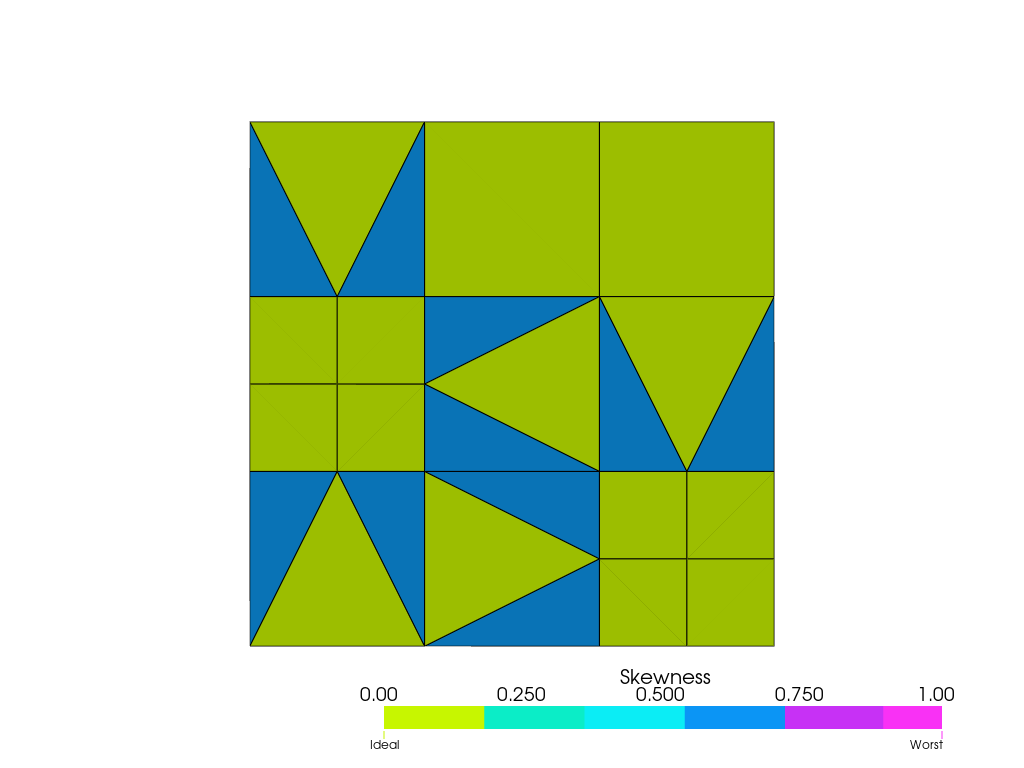

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

import pyvista as pv
from pyvista import examples

# Define the colors we want to use
blue = np.array([12/256, 238/256, 246/256, 1])
black = np.array([11/256, 11/256, 11/256, 1])
grey = np.array([189/256, 189/256, 189/256, 1])
yellow = np.array([255/256, 247/256, 0/256, 1])
green = np.array([200/256, 247/256, 0/256, 1])
lightgreen = np.array([200/256, 247/256, 200/256, 1])
greenblue = np.array([12/256, 238/256, 200/256, 1])
darkblue = np.array([12/256, 150/256, 246/256, 1])
purple= np.array([200/256, 50/256, 246/256, 1])
pink= np.array([250/256, 50/256, 246/256, 1])
lightpink = np.array([250/256, 50/256, 246/256, 0.7])
orange = np.array([250/256, 150/256, 0/256, 0.7])
yelloworange = np.array([250/256, 200/256, 0/256, 0.7])

skewness = np.linspace(mesh['Skewness'].min(), mesh['Skewness'].max(), 256)
newcolors = np.empty((256, 4))
newcolors[skewness >= 0] = green
#newcolors[skewness > 0.1] = lightgreen
newcolors[skewness > 0.1] = greenblue
newcolors[skewness > 0.2] = blue
newcolors[skewness > 0.3] = darkblue
newcolors[skewness > 0.4] = purple
newcolors[skewness > 0.5] = pink
newcolors[skewness > 0.6] = lightpink
newcolors[skewness > 0.7] = orange
newcolors[skewness > 0.8] = yelloworange
newcolors[skewness > 0.9] = yellow
newcolors[skewness >= 1] = orange

my_colormap = ListedColormap(newcolors)
annotations = {
    1: "Worst",
    0: "Ideal",
}

pl = pyvista.Plotter()
pl.set_background('white')
pv.global_theme.font.color = 'black'
pl.add_mesh(mesh, show_edges=True, line_width=0.5,scalars='Skewness',
            cmap=my_colormap, annotations=annotations,clim=[0, 1])
pl.camera_position = 'xy'
pl.show()